In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


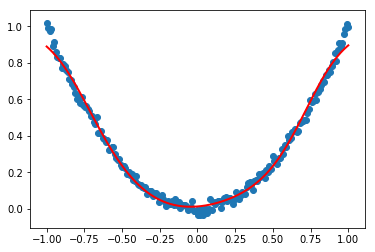

In [5]:
#使用numpy生成200个随机点
x_data = np.linspace(-1,1,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

#定义两个placeholder
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weight_L1 = tf.Variable(tf.random_normal([1,10]))#初始随机权值
biases_L1 = tf.Variable(tf.zeros([1,10]))#偏置值
Wx_plus_b_L1 = tf.matmul(x,Weight_L1) + biases_L1
#用双曲正切函数作为激活函数
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
#输出层信号综合
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#定义代价函数以及训练方法
loss = tf.reduce_mean(tf.square(y-prediction))

#使用梯度下降发训练
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(20000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=2)
    plt.show()